In [5]:
# Importing required libaries

import numpy as np
import pandas as pd

# Visualization libaraires
import matplotlib.pyplot as plt
import seaborn as sns

# ignore warning
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('./CreditCard.csv')

df['CarOwner'] = df['CarOwner'].map({'Y': 1, 'N': 0})
df['PropertyOwner'] = df['PropertyOwner'].map({'Y': 1, 'N': 0})
df['Gender'] = df['Gender'].map({'M': 1, 'F': 0})
df.head()

,Ind_ID,CreditApprove,Gender,CarOwner,PropertyOwner,#Children,WorkPhone,Email_ID
0,5008827,1,1.0,1,1,0,0,0
1,5009744,1,0.0,1,0,0,1,0
2,5009746,1,0.0,1,0,0,1,0
3,5009749,1,0.0,1,0,0,1,0
4,5009752,1,0.0,1,0,0,1,0


In [6]:
df.duplicated().sum()
df.columns


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ind_ID         340 non-null    int64  
 1   CreditApprove  340 non-null    int64  
 2   Gender         339 non-null    float64
 3   CarOwner       340 non-null    int64  
 4   PropertyOwner  340 non-null    int64  
 5   #Children      340 non-null    int64  
 6   WorkPhone      340 non-null    int64  
 7   Email_ID       340 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 21.4 KB


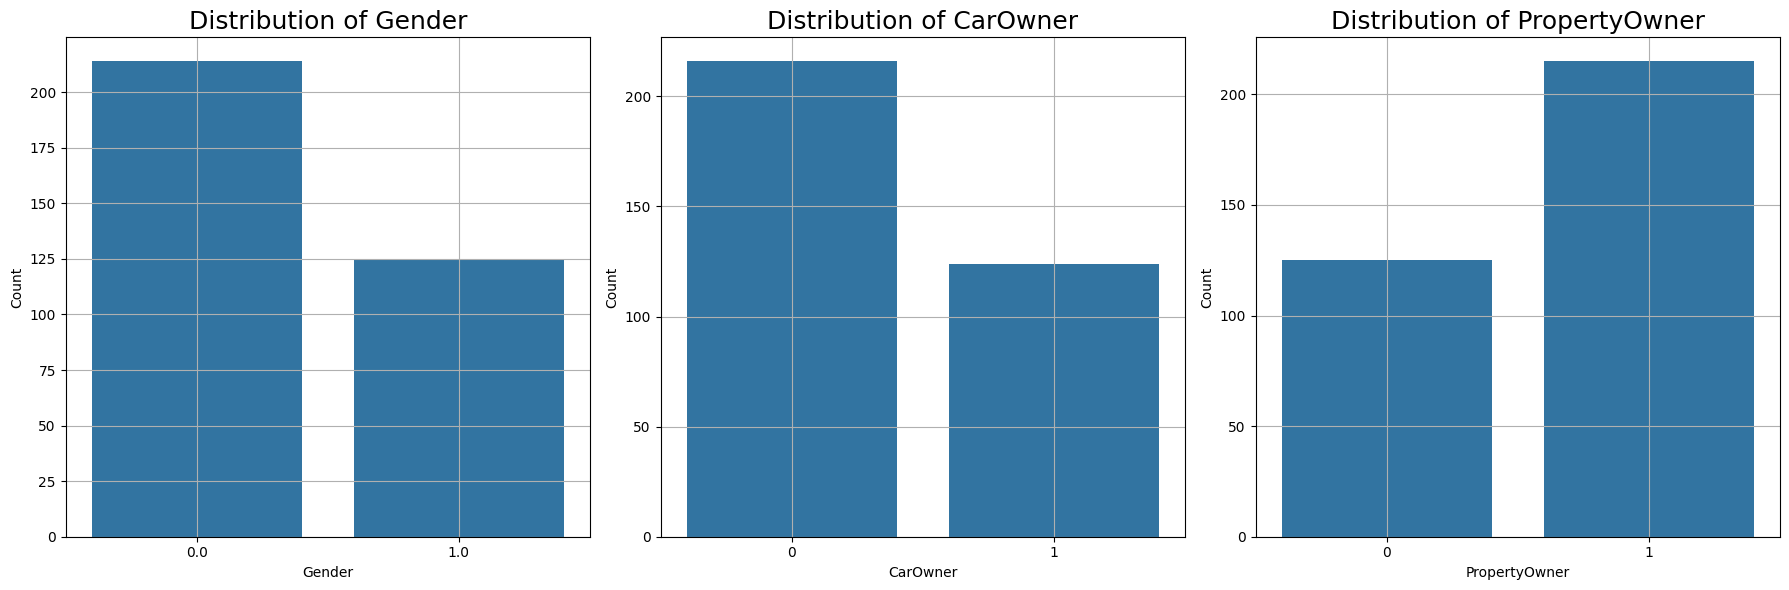

In [10]:
cols = ['Gender', 'CarOwner', 'PropertyOwner']

# Set up the figure and axes

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot univariate distributions for each column
for i, col in enumerate(cols):
    sns.countplot(data=df , x=col, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}' , fontsize=18 )
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x')
    axes[i].grid(True)

plt.tight_layout()
plt.show()









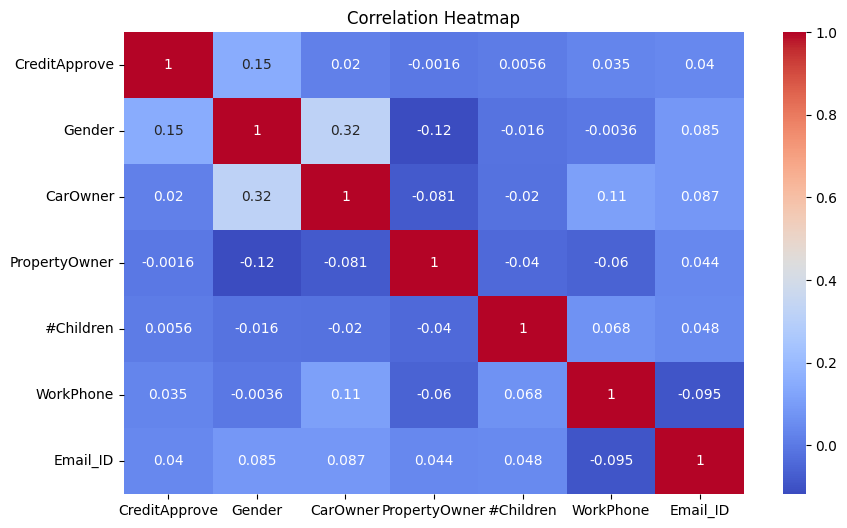

In [11]:
features=['CreditApprove',	'Gender',	'CarOwner',	'PropertyOwner',	'#Children',	'WorkPhone',	'Email_ID']

plt.figure(figsize = (10,6))
sns.heatmap(df[features].corr(), annot=True , cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [16]:
# example of hill climbing the test set for a classification task
from random import randint
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

import numpy as np
import pandas as pd

# Visualization libaraires
import matplotlib.pyplot as plt
import seaborn as sns

# ignore warning
import warnings
warnings.filterwarnings("ignore")


# load or prepare the classification dataset
def load_dataset():
	df = pd.read_csv('./CreditCard.csv')

	df['CarOwner'] = df['CarOwner'].map({'Y': 1, 'N': 0})
	df['PropertyOwner'] = df['PropertyOwner'].map({'Y': 1, 'N': 0})
	df['Gender'] = df['Gender'].map({'M': 1, 'F': 0})
	X = df[['Gender',	'CarOwner',	'PropertyOwner',	'#Children',	'WorkPhone',	'Email_ID']].to_numpy()
	Y = df[['CreditApprove',]].to_numpy()
	return X, Y


In [ ]:
# Create a list with random entries of 1 or -1
random_list = [random.choice([1, -1]) for _ in range(list_length)]

print(random_list)

(339, 6) (339, 1)
(227, 6) (112, 6) (227, 1) (112, 1)
8.274001047953579
(227, 6)
(227, 1)
>0, error=4.105
>1, error=1.738
>5, error=1.721
>12, error=1.517
>39, error=1.416


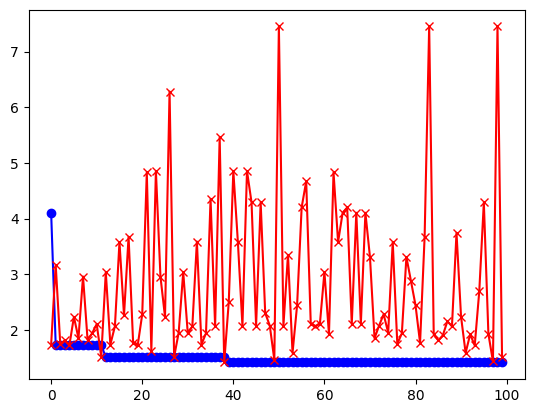

The train error for weights: [-1, 1, -1, 1, -1, -1] is 2.505133031884958
The test error for weights: [-1, 1, -1, 1, -1, -1] is 2.336734693877551


In [51]:
# example of hill climbing the test set for a classification task
from random import randint
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
import random
# load or prepare the classification dataset
# def load_dataset():
# 	return make_classification(n_samples=5000, n_features=20, n_informative=15, n_redundant=5, random_state=1)


# load or prepare the classification dataset
def load_dataset():
	df = pd.read_csv('./CreditCard.csv')
	df = df.dropna()
	df['CarOwner'] = df['CarOwner'].map({'Y': 1, 'N': 0})
	df['PropertyOwner'] = df['PropertyOwner'].map({'Y': 1, 'N': 0})
	df['Gender'] = df['Gender'].map({'M': 1, 'F': 0})
	X = df[['Gender',	'CarOwner',	'PropertyOwner',	'#Children',	'WorkPhone',	'Email_ID']].to_numpy()
	Y = df[['CreditApprove',]].to_numpy()
	return X, Y

# evaluate a set of predictions
def evaluate_predictions(y_test, yhat):
	return accuracy_score(y_test, yhat)

# create a random set of predictions
def random_predictions(n_examples):
	return [randint(0, 1) for _ in range(n_examples)]


def random_start_point(number_of_weight):
	random_list = [random.choice([1, -1]) for _ in range(number_of_weight)]
	return random_list

def adjcent_weight(incoming_list):
	adjcent_list = [-x for x in incoming_list]
	return adjcent_list

# Define the function f(x) with weights
def f(x, weights):
    return np.dot(x, weights)


# Define the loss function r(w)
def loss_function(X, y, weights):
    # X is the matrix of input features
    # y is the vector of ground truth labels
    # weights is the vector of weights
    predictions = f(X, weights)
    errors = predictions - y
    squared_errors = np.square(errors)
    return np.mean(squared_errors)

# modify the current set of predictions
def modify_predictions(current, n_changes=1):
	# copy current solution
	updated = current.copy()
	for i in range(n_changes):
		# select a point to change
		ix = randint(0, len(updated)-1)
		# flip the class label
		updated[ix] = 1 - updated[ix]
	return updated

# run a hill climb for a set of predictions
def hill_climb_testset(X_test, y_test, max_iterations):
	total_number_weight = X_test.shape[1]
	errors = list()
	values = list()
	# generate the initial solution
	weights = random_start_point(number_of_weight = total_number_weight)
	# evaluate the initial solution
	error = loss_function(X_test, y_test,[-1]*6)
	value = loss_function(X_test, y_test,adjcent_weight([-1]*6))
	print(error)
	print(X_test.shape)
	print(y_test.shape)
	# hill climb to a solution
	for i in range(max_iterations):
		if value < error:
			weights = adjcent_weight(weights)
			solution_weights, error = weights, value
			print('>%d, error=%.3f' % (i, error))
		else:
			weights = random_start_point(number_of_weight = total_number_weight)
		
		
		value = loss_function(X_test, y_test, weights)
		
		
		# record error
		errors.append(error)
		values.append(value)
		
		# stop once we achieve the best error
		if error == 0.0:
			break
		# evaluate candidate
		# check if it is as good or better
		# print(f"Value:	{value} --------  error: {error}")
		
	return solution_weights, errors, values

# load the dataset
X, y = load_dataset()
print(X.shape, y.shape)
# split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# run hill climb
# yhat, scores = hill_climb_testset(X_test, y_test, 20000)
solution_weights, errors, values = hill_climb_testset(X_train, y_train, 100)
# plot the scores vs iterations
# pyplot.plot(errors)

plt.plot(errors, label='Errors 1', color='blue', marker='o')  # First dataset
plt.plot(values, label='Errors 2', color='red', marker='x')   # Second dataset

pyplot.show()

print(f"The train error for weights: {solution_weights} is {loss_function(X_train, y_train, solution_weights)}")
print(f"The test error for weights: {solution_weights} is {loss_function(X_test, y_test, solution_weights)}")

In [1]:
import numpy as np

# Define the function f(x) with weights
def f(X, weights):
    """
    Function to compute predictions based on input features X and weights.
    """
    return np.dot(X, weights)

# Define the loss function r(w)
def loss_function(X, y, weights):
    """
    Compute the loss function based on predictions and ground truth labels.
    """
    predictions = f(X, weights)
    errors = predictions - y
    squared_errors = np.square(errors)
    return np.mean(squared_errors)

# Define the fitness function as e^(-e_r(w))
def fitness_function(X, y, weights):
    """
    Compute the fitness function as e^(-e_r(w)).
    """
    loss = loss_function(X, y, weights)
    fitness = np.exp(-loss)
    return fitness

# Example usage
# X is an array of shape (n_samples, n_features)
# y is an array of shape (n_samples,)
# weights is an array of shape (n_features,)
X = np.array([[1, 2], [3, 4], [5, 6]])  # Example feature matrix
y = np.array([1, 2, 3])                   # Example ground truth labels
weights = np.array([0.5, 0.5])            # Example weights

# Compute the fitness
fitness = fitness_function(X, y, weights)

print("Fitness:", fitness)


Fitness: 0.05411376622282161


In [ ]:
current_node_dict = dict(sorted(current_node_dict.items(), key=lambda item: (item[0]), reverse=False))


String: [-1, 1, 1, -1, -1, -1] Generation: 1 Fitness: 0.1683454738080203  Loss: 1.781737019343723
String: [-1, 1, 1, -1, 1, -1] Generation: 2 Fitness: 0.21213082015685575  Loss: 1.5505521184117785
String: [-1, 1, 1, -1, 1, -1] Generation: 3 Fitness: 0.21213082015685575  Loss: 1.5505521184117785
String: [-1, 1, 1, -1, 1, -1] Generation: 4 Fitness: 0.21213082015685575  Loss: 1.5505521184117785
String: [-1, 1, 1, -1, 1, -1] Generation: 5 Fitness: 0.21213082015685575  Loss: 1.5505521184117785
String: [-1, 1, 1, -1, 1, 1] Generation: 6 Fitness: 0.22781222578984225  Loss: 1.4792335604458715
String: [-1, 1, 1, -1, 1, 1] Generation: 7 Fitness: 0.22781222578984225  Loss: 1.4792335604458715
String: [-1, 1, 1, -1, 1, 1] Generation: 8 Fitness: 0.22781222578984225  Loss: 1.4792335604458715
String: [-1, 1, 1, -1, 1, 1] Generation: 9 Fitness: 0.22781222578984225  Loss: 1.4792335604458715
String: [-1, 1, 1, -1, 1, 1] Generation: 10 Fitness: 0.22781222578984225  Loss: 1.4792335604458715
String: [-1, 1,

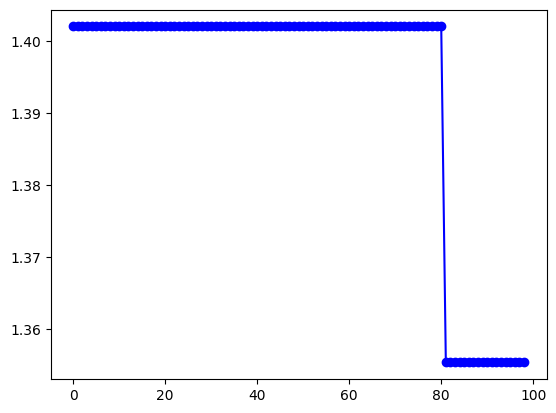

In [58]:
import random
from itertools import product
# example of hill climbing the test set for a classification task
from random import randint
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import random
# load or prepare the classification dataset
# def load_dataset():
# 	return make_classification(n_samples=5000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
import pandas as pd

# load or prepare the classification dataset
def load_dataset():
	df = pd.read_csv('./CreditCard.csv')
	df = df.dropna()
	df['CarOwner'] = df['CarOwner'].map({'Y': 1, 'N': 0})
	df['PropertyOwner'] = df['PropertyOwner'].map({'Y': 1, 'N': 0})
	df['Gender'] = df['Gender'].map({'M': 1, 'F': 0})
	X = df[['Gender',	'CarOwner',	'PropertyOwner',	'#Children',	'WorkPhone',	'Email_ID']].to_numpy()
	Y = df[['CreditApprove',]].to_numpy()
	return X, Y
GENES = list(product([-1, 1], repeat=6))
POP_SIZE = 10
MUT_RATE = 0.1
TOTAL_CHROMOSOMES = 2
CROSS_OVER_POINT = 3
TARGET = 'rayan ali' #total number of weights
# GENES = ' abcdefghijklmnopqrstuvwxyz'


def f(X, weights):
    """
    Function to compute predictions based on input features X and weights.
    """
    return np.dot(X, weights)

# Define the loss function r(w)
def loss_function(X, y, weights):
    """
    Compute the loss function based on predictions and ground truth labels.
    """
    predictions = f(X, weights)
    errors = predictions - y
    squared_errors = np.square(errors)
    return np.mean(squared_errors)

# Define the fitness function as e^(-e_r(w))
def fitness_function(X, y, weights):
    """
    Compute the fitness function as e^(-e_r(w)).
    """
    loss = loss_function(X, y, weights)
    fitness = np.exp(-loss)
    return fitness, loss

def initialize_pop():
    population = list()

    for i in range(POP_SIZE):
        population.append(list(random.choice(GENES)))

    return population



def crossover(selected_chromo):
    offspring_cross = []
#   for i in range(int(POP_SIZE)):
#     parent1 = random.choice(selected_chromo)
#     parent2 = random.choice(population[:int(POP_SIZE*50)])

#     p1 = parent1[0]
#     p2 = parent2[0]

#     child =  p1[:CROSS_OVER_POINT] + p2[CROSS_OVER_POINT:]
#     offspring_cross.extend([child])

    for i in range(int(POP_SIZE)):
        candidate_chromosomes = random.sample(selected_chromo, k=3)
        candidate_chromosomes_sorted = sorted(candidate_chromosomes, key= lambda x:x[1], reverse=True)
  

        p1 = candidate_chromosomes_sorted[0][0]
        p2 = candidate_chromosomes_sorted[1][0]

        # crossover_point = random.randint(1, CHROMO_LEN-1)
        child =  p1[:CROSS_OVER_POINT] + p2[CROSS_OVER_POINT:]
        offspring_cross.extend([child])
    return offspring_cross
#   return offspring_cross
def mutate(offspring, MUT_RATE):
    mutated_offspring = []

    for arr in offspring:
        # print(arr)
        for i in range(len(arr)):
            if random.random() < MUT_RATE:
                arr[i] = random.choice([1,-1])
        mutated_offspring.append(arr)
    return mutated_offspring

def selection(population):
    sorted_chromo_pop = sorted(population, key= lambda x: x[2])
    return sorted_chromo_pop[:int(0.5*POP_SIZE)]

def fitness_cal(x, y, chromo_from_pop):
    fitness_probability, loss = fitness_function(x, y, chromo_from_pop)
    
    return [chromo_from_pop, fitness_probability, loss]

def replace(new_gen, population):
    new_gen = sorted(new_gen, key= lambda x: x[2])

    for _ in range(len(population)):
        if population[_][2] > new_gen[_][2]:
          population[_][0] = new_gen[_][0]
          population[_][1] = new_gen[_][1]
          population[_][2] = new_gen[_][2]
    return population


losses = []

def main(POP_SIZE, MUT_RATE, TARGET, GENES):
    # 1) initialize population
    initial_population = initialize_pop()
    found = False
    population = []
    generation = 1
    X, Y = load_dataset()
    # 2) Calculating the fitness for the current population
    for _ in range(len(initial_population)):
        population.append(fitness_cal(X, Y, initial_population[_]))

    # now population has 2 things, [chromosome, fitness]
    # 3) now we loop until TARGET is found
    # while not found:
    population = sorted(population, key= lambda x:x[2], reverse=True)
    while generation < 100:

        # 3.1) select best people from current population
        selected = selection(population)

        # 3.2) mate parents to make new generation
        population = sorted(population, key= lambda x:x[2], reverse=True)
        crossovered =  crossover(selected)
                
        # 3.3) mutating the childeren to diversfy the new generation
        mutated = mutate(crossovered, MUT_RATE)

        new_gen = []
        for _ in mutated:
            new_gen.append(fitness_cal(X,Y, _))
        
        # 3.4) replacement of bad population with new generation
        # we sort here first to compare the least fit population with the most fit new_gen

        new_gen = sorted(new_gen, key= lambda x:x[2])
        population = replace(new_gen, population)

        population = sorted(population, key= lambda x:x[2], reverse=True)
        # population = sorted(population, key= lambda x:x[2], reverse=True)

        if (population[-1][2] == 0):
            print('Target found')
            print('String: ' + str(population[0][0]) + ' Generation: ' + str(generation) + ' Fitness: ' + str(population[0][1]), ' Loss: ' + str(population[0][2]))
            break
        print('String: ' + str(population[0][0]) + ' Generation: ' + str(generation) + ' Fitness: ' + str(population[0][1]), ' Loss: ' + str(population[0][2]))
        generation+=1
        losses.append(population[-1][2])


main(POP_SIZE, MUT_RATE, TARGET, GENES)


plt.plot(losses, label='Errors 1', color='blue', marker='o')  # First dataset

plt.show()

In [ ]:
df.duplicated().sum()
df.columns


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ind_ID         340 non-null    int64  
 1   CreditApprove  340 non-null    int64  
 2   Gender         339 non-null    float64
 3   CarOwner       340 non-null    int64  
 4   PropertyOwner  340 non-null    int64  
 5   #Children      340 non-null    int64  
 6   WorkPhone      340 non-null    int64  
 7   Email_ID       340 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 21.4 KB


In [42]:
import random

a = random.sample([1,20, 34, 5, 4,6, 7], k =5)
print(a)

[34, 6, 5, 4, 20]


In [20]:
a = [1,2,3,4]



child =  a[:2] + a[1:]

print([child])

[[1, 2, 2, 3, 4]]
